## GRIP: THE SPARKS FOUNDATION
## AUTHOR: APOORVA TUMMA
## TASK 1: PREDICTION USING SUPERVISED ML

### To predict the percentage of a student based on the number of study hours and the predicted score if a student sudies for 9.5hrs/day.

### Dataset: http://bit.ly/w-data

In [1]:
# Importing the required Libraries

In [44]:
# For data analysis and Calculations
import pandas as pd
import numpy as np  

# For data visualization
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

In [3]:
# Load and Read data:

In [22]:
data=pd.read_csv('http://bit.ly/w-data')
print('Data is successfully imported')
print('The dimensions of the dataset is: ',data.shape)
data.head()

Data is successfully imported
The dimensions of the dataset is:  (25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
# To find information on the data set

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
# Checking for null values

In [9]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### From the above we can say that there are no null values in the dataset.

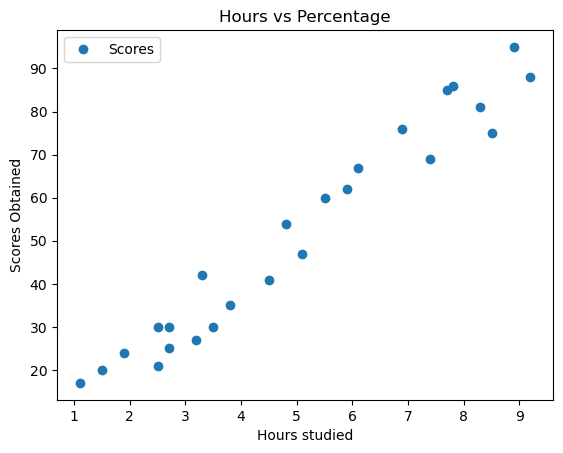

In [56]:
# Plotting the distribution of scores
data.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Scores Obtained')
plt.show()

#### From the above graph we can observe that there is a positive linear relationship between number of hours studied in a day and the scores. 
#### Since it has a linear relationship we can use the linear regression supervised machine learning model on it to predict the future values.

In [ ]:
# Finding the correlation

In [24]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### From the above observation we can say that both the variables are strong positive correlation

### Data Preparation
####  We divide the data into 

In [25]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [58]:
# Checking the size of training- input data
print(x_train.size)

20


In [59]:
# Check the size of test-input data
print(x_test.size)

5


In [60]:
# Check the size of training output data
print(y_train.shape)

(20,)


In [61]:
# Check the size of test output data
print(y_test.shape)

(5,)


### Training the Algorithm
#### We have split the data into training and testing sets. We now train our algorithm

In [63]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
print('Training Complete')

Training Complete


### Visualizing the Model
#### After the training model, now it's time to visualize it.

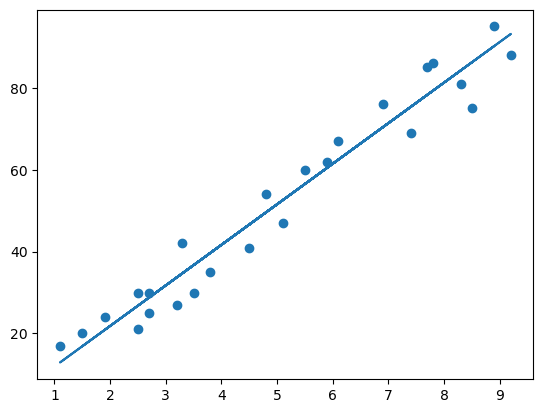

In [64]:
# Plot the regression line
plt.scatter(data["Hours"],data["Scores"])
y_value=regressor.coef_*x+regressor.intercept_
plt.plot(x,y_value)

### Making Prediction

In [71]:
# Predicting the scores
pred=regressor.predict(x_test)

In [72]:
# Comparing Actual vs Predicted score
actual_pred=pd.DataFrame({'Target':y_test,'Predicted':pred})
actual_pred

,Target,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


### Predicted score if the student studies for 9.25 hours/day is?

In [33]:
# intercept made by the line\
regressor.intercept_

2.8102364628265804

In [34]:
# slope of the line
regressor.coef_

array([9.59563563])

In [89]:
hours=9.25
h_predict=regressor.coef_*hours+regressor.intercept_
print("If the student studies for 9.25 hours per day then he/she will score {}% in exam.".format(h_predict))

If the student studies for 9.25 hours per day then he/she will score [93.69173249]% in exam.


### Checking the assumption of linear regression

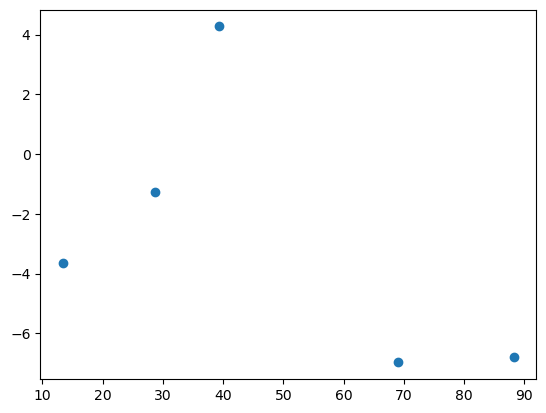

In [38]:
plt.scatter(pred,pred-y_test)

#### Here we get random plot between value and error which satisfy assumptions of linear regression.

<Axes: xlabel='Scores', ylabel='Density'>

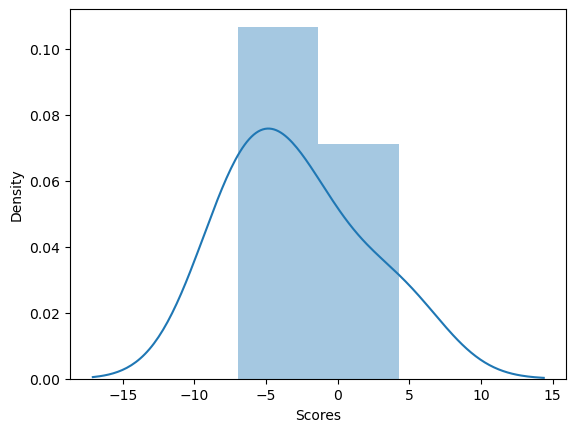

In [50]:
sns.distplot(pred-y_test)

#### Here we get a nearly Normal Distribution Curve of error which satisfy assumption of Linear Regression

### Model Evaluation

In [55]:
# Evaluate mean absolute error
from sklearn.metrics import mean_absolute_error
error=mean_absolute_error(y_test,pred)
print("Mean Absolute Error: ",error)

# Evaluate squared error
from sklearn.metrics import mean_squared_error
error=mean_squared_error(y_test,pred)
print("Mean Squared Error: ",error)

# Evaluate r2_score
from sklearn.metrics import r2_score
r2_score=r2_score(y_test,pred)
print("r2_score: ",r2_score)


Mean Absolute Error:  4.5916495300630285
Mean Squared Error:  25.58407829653998
r2_score:  0.971014141329942
